In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train,x_test = x_train/255,x_test/255

In [4]:
def create_model(optimizer):
  model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10,activation='softmax')])
  model.compile(optimizer = optimizer,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


In [5]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

accurate_history = {}

for i,j in optimizers.items():
  model = create_model(j)
  history = model.fit(x_train,y_train,verbose = 1,epochs=5)
  accurate_history[i] = history.history['accuracy']

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7152 - accuracy: 0.8051
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8918
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3246 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9194
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2602 - accuracy: 0.9263
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3453 - accuracy: 0.8990
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1716 - accuracy: 0.9498
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1335 - accuracy: 0.9610
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1133 - accuracy: 0.9662
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0989 - accura

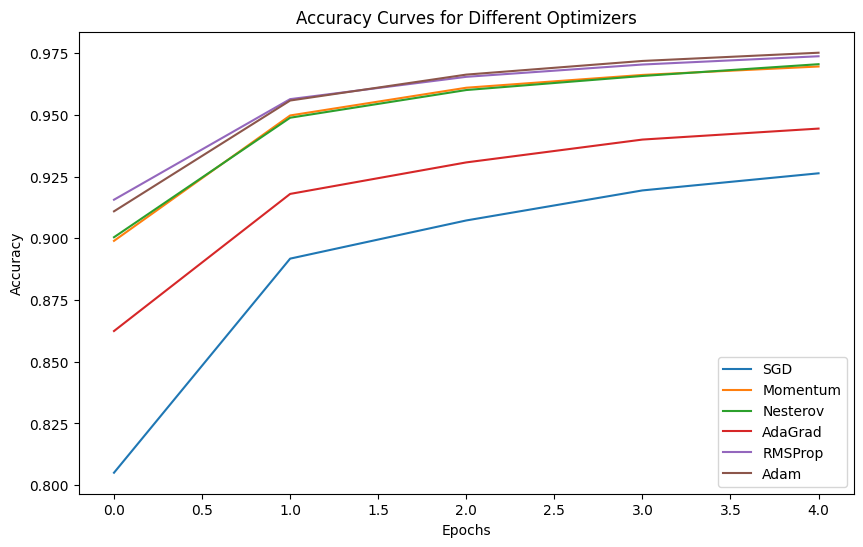

In [8]:
plt.figure(figsize=(10, 6))
for i,j in accurate_history.items():
    plt.plot(j, label=i)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
